In [ ]:
# !pip install opencv-python
# !pip install imutils
# !pip install blurhash-python
# !pip install numpy --upgrade
# !pip install pytesseract
# !pip install tesseract-ocr

In [ ]:
import os 
import numpy as np
import cv2
import imutils
import blurhash
from PIL import Image
import pytesseract
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [ ]:
FILES_DIR = "/content/"

def read_image(input_image):
    try:
        image = cv2.imread(input_image)
    except AttributeError: 
        print(f"Your input file '{input_image}' doesn't seems to be a valid.")
    except:
        print("Unknown error, sorry.")
        
    return image
    
def show_image_opencv(image_instance, name="Bill"):
    try:
        cv2.imshow(name, image_instance)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except:
        print("Unknown error, sorry.")

def save_image_opencv(image_instance, target_name=os.path.join(FILES_DIR, "result.jpg")):
    
    try:
        cv2.imwrite(target_name, image_instance)
    except:
        print(f"Unknown error, sorry. Your provided instance: {image_instance} with target: {target_name}")
    

input_image = read_image(os.path.join(FILES_DIR, "/content/cap4.jpeg"))
original_image = input_image.copy()

save_image_opencv(input_image, os.path.join(FILES_DIR, "input_image.png"))

In [ ]:
def detect_edges(input_image):
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    gray_image_blured = cv2.blur(gray_image, (3, 3))
    edged_image = cv2.Canny(gray_image_blured, 100, 400, 3)

    return edged_image

edged_image = detect_edges(input_image)

save_image_opencv(edged_image, os.path.join(FILES_DIR, "edged_image2.png"))


In [ ]:
def calculate_draw_contours(edged_image, target_image): 
    all_contours = cv2.findContours(edged_image.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    all_contours = imutils.grab_contours(all_contours)
    all_contours = sorted(all_contours, key=cv2.contourArea, reverse=True)[:1]
    contour_perimeter = cv2.arcLength(all_contours[0], True) 
    approximated_poly = cv2.approxPolyDP(all_contours[0], 0.02 * contour_perimeter, True)
    cv2.drawContours(target_image, [approximated_poly], -1, (0,255,0), 2)
    
    return approximated_poly, contour_perimeter


approximated_poly, contour_perimeter = calculate_draw_contours(edged_image, input_image)

save_image_opencv(input_image, os.path.join(FILES_DIR, "contoured_image2.png"))


In [ ]:
approximated_poly = approximated_poly.reshape(4, 2)
rectangle = np.zeros((4, 2), dtype="float32")
                
s = np.sum(approximated_poly, axis=1)
rectangle[0] = approximated_poly[np.argmin(s)]
rectangle[2] = approximated_poly[np.argmax(s)]

diff = np.diff(approximated_poly, axis=1)
rectangle[1] = approximated_poly[np.argmin(diff)]
rectangle[3] = approximated_poly[np.argmax(diff)]

(tl, tr, br, bl) = rectangle

def calculate_max_width_height(tl, tr, br, bl):
    width_a = np.sqrt((tl[0] - tr[0])**2 + (tl[1] - tr[1])**2 )
    width_b = np.sqrt((bl[0] - br[0])**2 + (bl[1] - br[1])**2 )
    max_width = max(int(width_a), int(width_b))

    height_a = np.sqrt((tl[0] - bl[0])**2 + (tl[1] - bl[1])**2 )
    height_b = np.sqrt((tr[0] - br[0])**2 + (tr[1] - br[1])**2 )
    max_height = max(int(height_a), int(height_b))
    
    return max_width, max_height

max_width, max_height = calculate_max_width_height(tl, tr, br, bl)

In [ ]:
destinations = np.array([
        [0,0],
        [max_width - 1, 0],
        [max_width - 1, max_height - 1],
        [0, max_height - 1]], dtype="float32")

transformation_matrix = cv2.getPerspectiveTransform(rectangle, destinations)

def apply_transformation(image_instance, transformation_matrix, max_width, max_height):
    scan = cv2.warpPerspective(image_instance, transformation_matrix, (max_width, max_height))
    return scan

scanned_image = apply_transformation(original_image, transformation_matrix, max_width, max_height)

save_image_opencv(scanned_image, os.path.join(FILES_DIR, "scanned_image2.png"))

In [ ]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

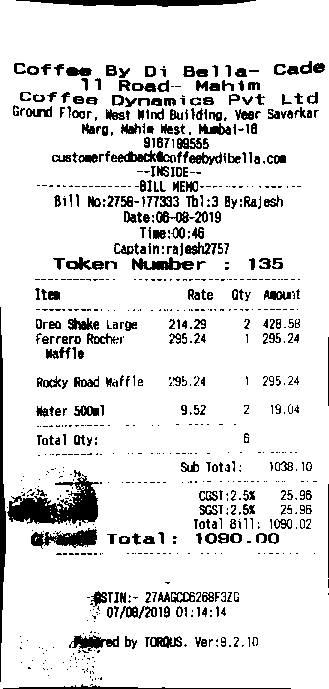

In [ ]:
image=cv2.imread('/content/scanned_image.png')
image = cv2.resize(image, None, fx=0.6, fy=0.6, interpolation=cv2.INTER_AREA)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
from google.colab.patches import cv2_imshow

cv2_imshow(threshold_img)

In [ ]:
text = pytesseract.image_to_string(threshold_img)
print(text)

Coffee By Di Bella— Cade
11 Road— Mahim
Coffes Dynamics Pvt Ltd
Ground Floor, West Wind Buitding, Year Savarkar
Marg, Mabie West, Munbai-1d
9767190555
customer feedbackticaffeebydibella.coa
~TSIDE--

   

Date:06-08-2019
Time:00:46
Captain:rajesh275?
Token Number 135

  

Trea Rate Cty Amount

 

Oren Shake Large = 214.28 2 428.58

Ferraro Rocher 295.24 1 285.24
wattle
Rocky Road Waffle 295.24 1 295.24

Mater 50007 952-2 19.08

6
Sub Total: 1038.10
GGST:2.5% 25.96

SGST:2,58 75.95
Total 8111; 1090.02

Grell Total: tos0.00

   

“@STIN:~ 27aAgcoaz6RFaZG
07/08/2019 Ot: 14:14

illiped by TORS. Yer:3.2.10

 



In [ ]:
rm_list = list()

In [ ]:
match=re.findall(r'\d+[/.-]\d+[/.-]\d{4}', text)
st=" "
st=st.join(match)
bill_date = st.split(" ")[0]
rm_list.append(bill_date)

In [ ]:
nltk.download('punkt',quiet=True)
nltk.download('wordnet',quiet=True)

True

In [ ]:
sent_tokens=nltk.sent_tokenize(text)
store_name = sent_tokens[0].splitlines()[0]
rm_list.append(store_name)

In [ ]:
price=re.findall("[0-9]+\.[0-9]+",text)
price = list(map(float,price)) 
bill_amount = max(price)

In [ ]:
i=1
address = ''
while True:
  try:
    st = sent_tokens[0].splitlines()[i]
    match=re.findall(r'\d{10}',st)
    if len(match) == 0:
      address += st + ' '
      i+=1
    else:
      break
  except:
    break

store_address = address
rm_list.append(store_address)

In [ ]:
nums = text.split("\n")
bill_no = None
check=["Bill Number","Bill No","Bill #","Invoice Number","Invoice No","Invoice #","Token Number","Token No","Token #"]
for i in range(0,len(nums)):
  for s in check:
    if s in nums[i]:
      bill_no = nums[i]
      break
rm_list.append(bill_no)

In [ ]:
tokens = word_tokenize(text)

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(text)
print(new_words)

['Coffee', 'By', 'Di', 'Bella', 'Cade', '11', 'Road', 'Mahim', 'Coffes', 'Dynamics', 'Pvt', 'Ltd', 'Ground', 'Floor', 'West', 'Wind', 'Buitding', 'Year', 'Savarkar', 'Marg', 'Mabie', 'West', 'Munbai', '1d', '9767190555', 'customer', 'feedbackticaffeebydibella', 'coa', 'TSIDE', 'Date', '06', '08', '2019', 'Time', '00', '46', 'Captain', 'rajesh275', 'Token', 'Number', '135', 'Trea', 'Rate', 'Cty', 'Amount', 'Oren', 'Shake', 'Large', '214', '28', '2', '428', '58', 'Ferraro', 'Rocher', '295', '24', '1', '285', '24', 'wattle', 'Rocky', 'Road', 'Waffle', '295', '24', '1', '295', '24', 'Mater', '50007', '952', '2', '19', '08', '6', 'Sub', 'Total', '1038', '10', 'GGST', '2', '5', '25', '96', 'SGST', '2', '58', '75', '95', 'Total', '8111', '1090', '02', 'Grell', 'Total', 'tos0', '00', 'STIN', '27aAgcoaz6RFaZG', '07', '08', '2019', 'Ot', '14', '14', 'illiped', 'by', 'TORS', 'Yer', '3', '2', '10']


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english')) 

In [ ]:
filtered_list=[w for w in new_words if w not in stop_words ]
print(filtered_list)

['Coffee', 'By', 'Di', 'Bella', 'Cade', '11', 'Road', 'Mahim', 'Coffes', 'Dynamics', 'Pvt', 'Ltd', 'Ground', 'Floor', 'West', 'Wind', 'Buitding', 'Year', 'Savarkar', 'Marg', 'Mabie', 'West', 'Munbai', '1d', '9767190555', 'customer', 'feedbackticaffeebydibella', 'coa', 'TSIDE', 'Date', '06', '08', '2019', 'Time', '00', '46', 'Captain', 'rajesh275', 'Token', 'Number', '135', 'Trea', 'Rate', 'Cty', 'Amount', 'Oren', 'Shake', 'Large', '214', '28', '2', '428', '58', 'Ferraro', 'Rocher', '295', '24', '1', '285', '24', 'wattle', 'Rocky', 'Road', 'Waffle', '295', '24', '1', '295', '24', 'Mater', '50007', '952', '2', '19', '08', '6', 'Sub', 'Total', '1038', '10', 'GGST', '2', '5', '25', '96', 'SGST', '2', '58', '75', '95', 'Total', '8111', '1090', '02', 'Grell', 'Total', 'tos0', '00', 'STIN', '27aAgcoaz6RFaZG', '07', '08', '2019', 'Ot', '14', '14', 'illiped', 'TORS', 'Yer', '3', '2', '10']


In [ ]:
print("\nStore Name : ",store_name,"\nStore Address : ",store_address,"\nBill Date : ",bill_date,"\nInvoice Number : ",bill_no,"\nTotal Amount : ",bill_amount)


Store Name :  Coffee By Di Bella— Cade 
Store Address :  11 Road— Mahim Coffes Dynamics Pvt Ltd Ground Floor, West Wind Buitding, Year Savarkar Marg, Mabie West, Munbai-1d  
Bill Date :  06-08-2019 
Invoice Number :  Token Number 135 
Total Amount :  1090.02
